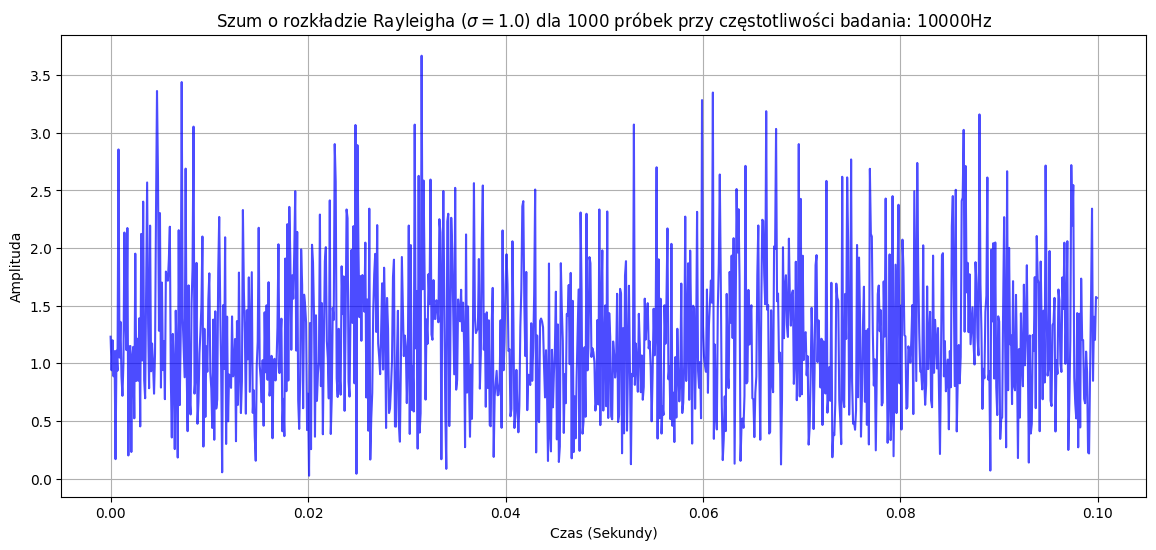

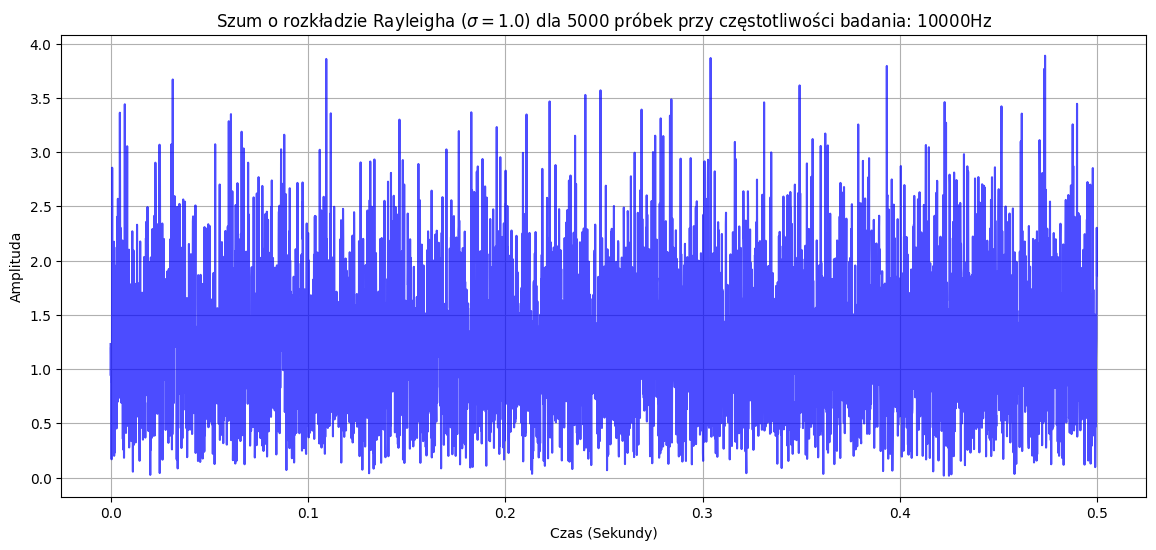

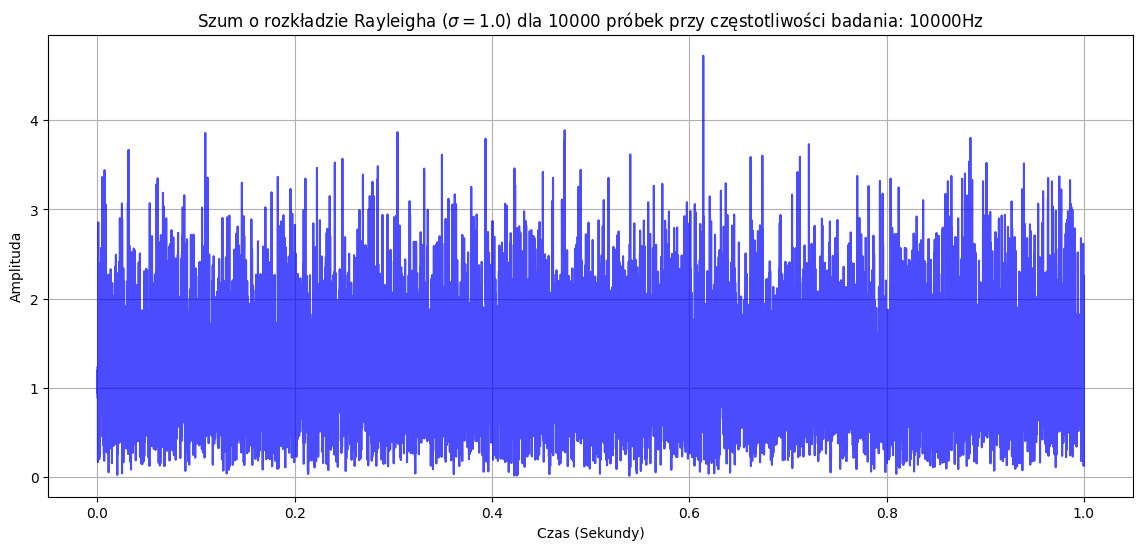

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(69420)

# Parametry symulacji
sigma = 1.0             # Parametr sigma rozkładu Rayleigha
sampling_freq = 10000  # Częstotliwość próbkowania w Hz
# 10, 100, 500, 20000
sample_sizes = [1000, 5000, 10000] # Liczba różnych próbek

num_samples = max(sample_sizes) # Liczba wszystkich próbek
duration = num_samples/sampling_freq

# Generowanie szumu Rayleigha
rayleigh_noise = np.random.rayleigh(scale=sigma, size=num_samples)

# Wizualizacja szumu
for samples in sample_sizes:
    x_time = np.array([x/num_samples * duration for x in range(samples)])
    plt.figure(figsize=(14, 6))
    plt.plot(x_time, rayleigh_noise[:samples], color="blue", alpha=0.7)
    plt.title(f"Szum o rozkładzie Rayleigha ($\\sigma=1.0$) dla {samples} próbek przy częstotliwości badania: {sampling_freq}Hz")
    plt.xlabel("Czas (Sekundy)")
    plt.ylabel("Amplituda")
    plt.grid(True)
    plt.show()

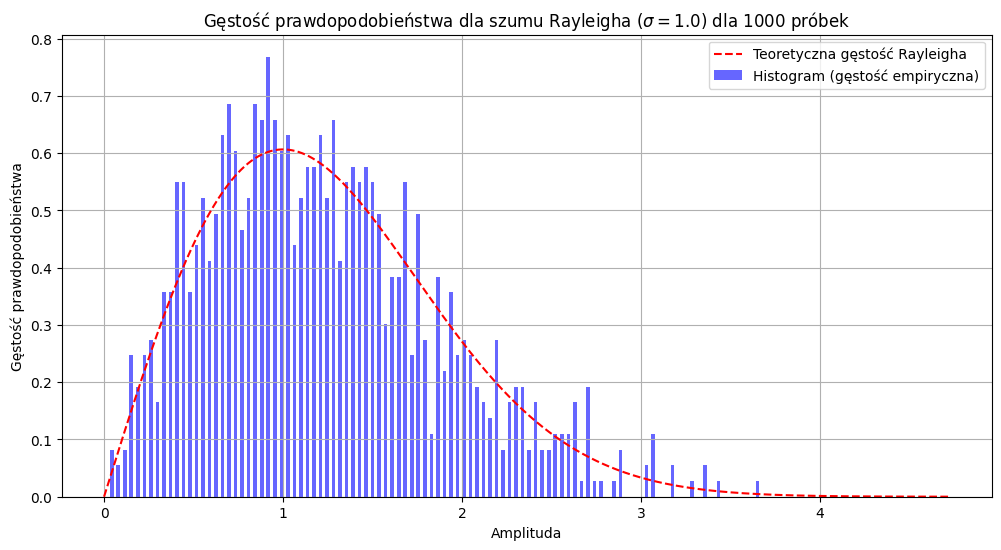

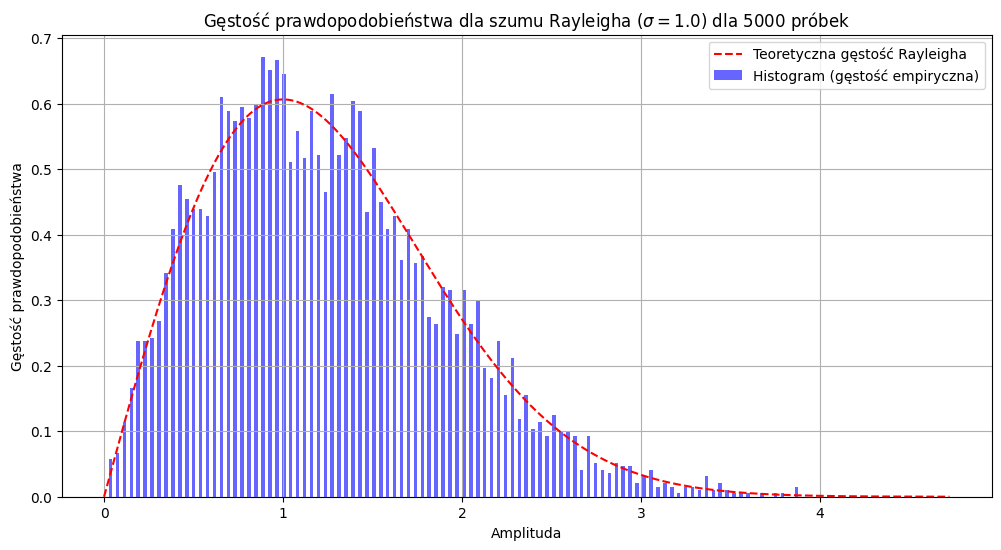

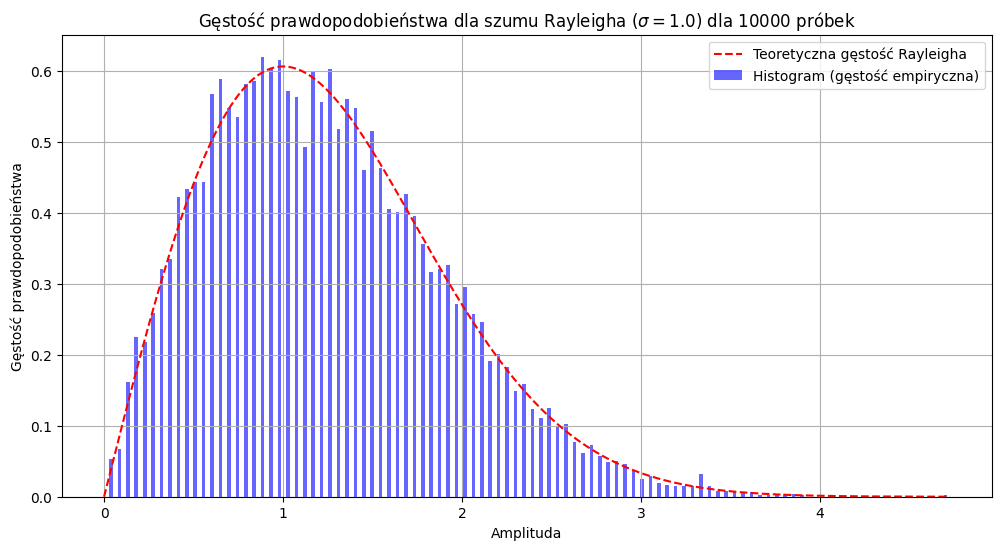

In [2]:
import scipy.stats as stats

# Obliczanie gęstości prawdopodobieństwa (PDF) dla wygenerowanego szumu Rayleigha
pdf_values = []
bins = []
bin_centers = []

x = []
rayleigh_pdf = []

for i in range(len(sample_sizes)):
    pdf_values_d, bins_d = np.histogram(rayleigh_noise[:sample_sizes[i]], bins=100, density=True)
    bin_centers_d = (bins_d[:-1] + bins_d[1:]) / 2  # Środkowe wartości przedziałów
    pdf_values.append(pdf_values_d)
    bins.append(bins_d)
    bin_centers.append(bin_centers_d)

    # Wzorcowa funkcja gęstości prawdopodobieństwa rozkładu Rayleigha dla porównania
    x.append(np.linspace(0, max(rayleigh_noise), sample_sizes[i]))
    rayleigh_pdf.append(stats.rayleigh.pdf(x[i], scale=sigma))

    # Rysowanie histogramu i PDF
    plt.figure(figsize=(12, 6))
    plt.bar(bin_centers[i], pdf_values[i], label="Histogram (gęstość empiryczna)", color="blue", width=0.02, alpha=0.6, )
    plt.plot(x[i], rayleigh_pdf[i], label="Teoretyczna gęstość Rayleigha", color="red", linestyle="--")
    plt.title(f"Gęstość prawdopodobieństwa dla szumu Rayleigha ($\\sigma=1.0$) dla {sample_sizes[i]} próbek")
    plt.xlabel("Amplituda")
    plt.ylabel("Gęstość prawdopodobieństwa")
    plt.legend()
    plt.grid(True)
    plt.show()

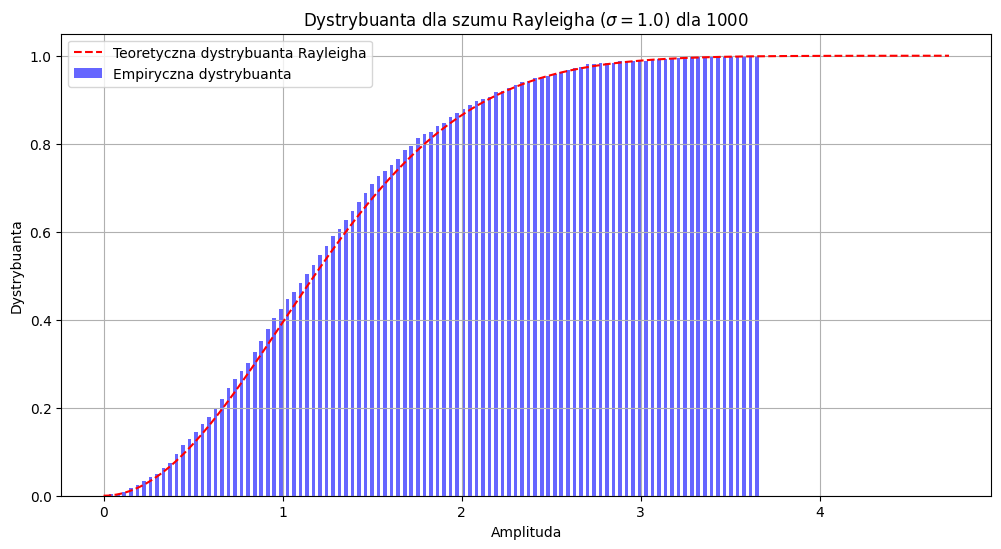

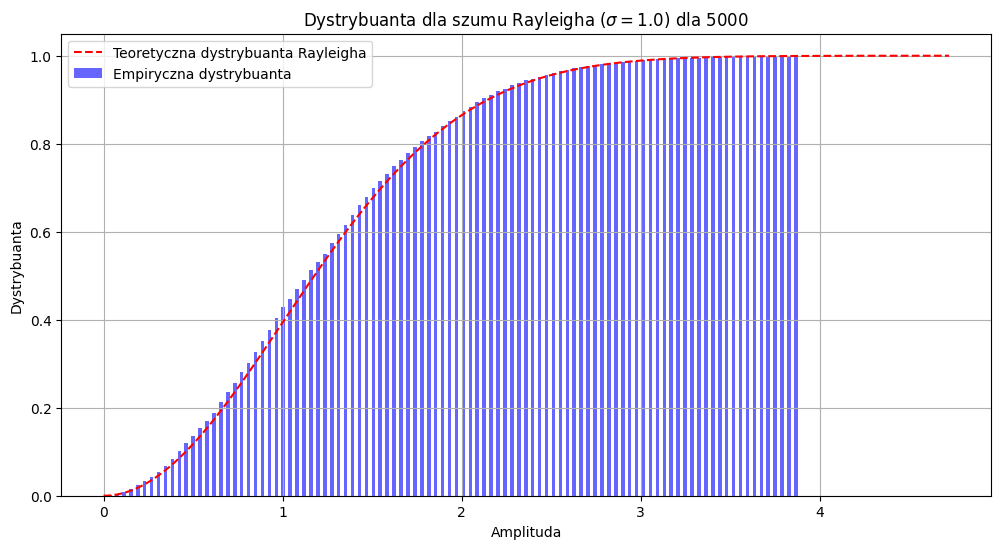

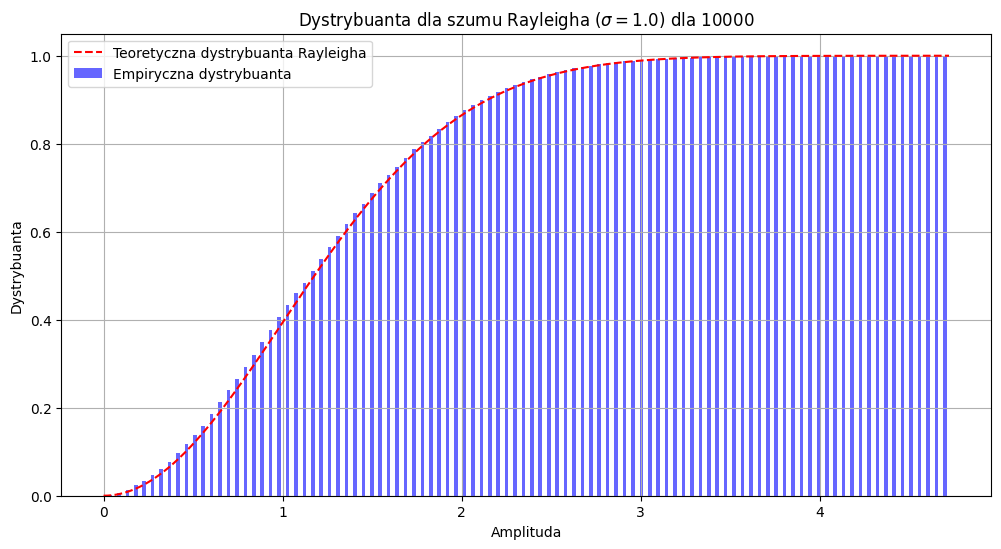

In [3]:
# Obliczanie dystrybuanty (CDF) dla rozkładu Rayleigha na podstawie wygenerowanego szumu
rayleigh_cdf_empirical = []

for i in range(len(sample_sizes)):
    rayleigh_cdf_empirical.append(np.cumsum(pdf_values[i] * np.diff(bins[i])))  # Numeryczna aproksymacja CDF z histogramu

    # Teoretyczna dystrybuanta rozkładu Rayleigha
    rayleigh_cdf_theoretical = stats.rayleigh.cdf(x[i], scale=sigma)

    # Rysowanie dystrybuanty
    plt.figure(figsize=(12, 6))
    plt.bar(bin_centers[i], rayleigh_cdf_empirical[i], label="Empiryczna dystrybuanta", color="blue", width=0.02, alpha=0.6)
    plt.plot(x[i], rayleigh_cdf_theoretical, label="Teoretyczna dystrybuanta Rayleigha", color="red", linestyle="--")
    plt.title(f"Dystrybuanta dla szumu Rayleigha ($\\sigma=1.0$) dla {sample_sizes[i]}")
    plt.xlabel("Amplituda")
    plt.ylabel("Dystrybuanta")
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
statistic_tables = []
summary_table = pd.DataFrame(sample_sizes, columns=["Sample Size"])
rayleigh_noise_means = []
rayleigh_noise_wariants = []
rayleigh_noise_st_dev = []
for i in range(len(sample_sizes)):
    table = pd.DataFrame(rayleigh_noise[:sample_sizes[i]], columns = ['x'])

    rayleigh_noise_means.append(rayleigh_noise[:sample_sizes[i]].mean())

    table['x - xsr'] = table['x'] - rayleigh_noise_means[i]
    table['(x - xsr)^2'] = table['x - xsr']**2

    rayleigh_noise_wariants.append((table['(x - xsr)^2'].sum())/(len(rayleigh_noise[:sample_sizes[i]])-1))
    rayleigh_noise_st_dev.append(rayleigh_noise_wariants[i]**(1/2))

    statistic_tables.append(table)

summary_table['Mean/Expected Value'] = rayleigh_noise_means
summary_table['Wariant'] = rayleigh_noise_wariants
summary_table['Standard Distribution'] = rayleigh_noise_st_dev
summary_table
#


,Sample Size,Mean/Expected Value,Wariant,Standard Distribution
0,1000,1.224375,0.425301,0.652151
1,5000,1.236764,0.430649,0.656238
2,10000,1.244796,0.433730,0.658582


In [5]:
# kowariancja

for table in statistic_tables:
    print("Table")
    samples = len(table)
    for j in range (100):
        samples_n_cov = samples - j
        table[f"j{j}"] = 0.0
        
        for i, row in table.iterrows():
            if i >= samples_n_cov:
                break
            table.loc[i, f"j{j}"] = table["x - xsr"][i] * table["x - xsr"][i+j]
            #table[f"j{j}"][i] = table["x - xsr"][i]
            #print(row[f"j{j}"])

statistic_tables[0]


Table


C:\Users\slawe\AppData\Local\Temp\ipykernel_2156\100565395.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[f"j{j}"] = 0.0
C:\Users\slawe\AppData\Local\Temp\ipykernel_2156\100565395.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table[f"j{j}"] = 0.0
C:\Users\slawe\AppData\Local\Temp\ipykernel_2156\100565395.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

Table


: 

In [ ]:
statistic_tables[-1]["j1"].sum()/9999

np.float64(-0.00042808403472011954)

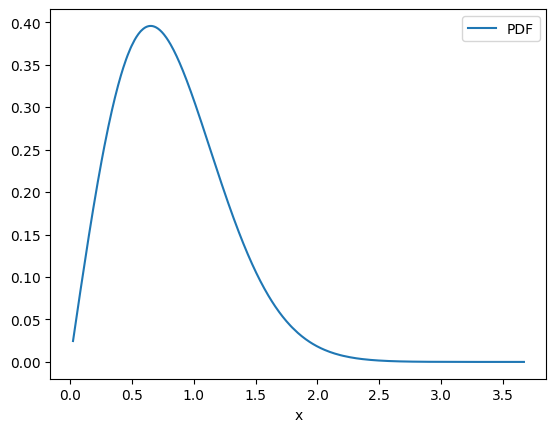

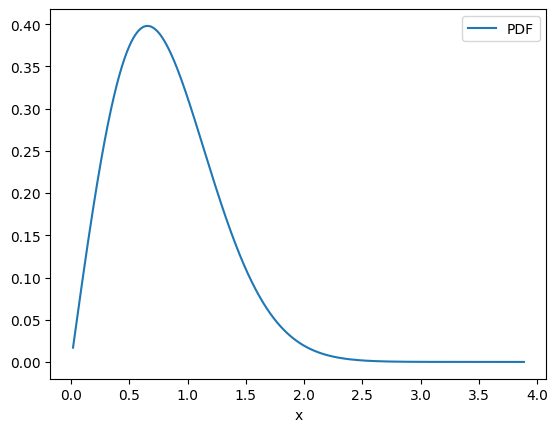

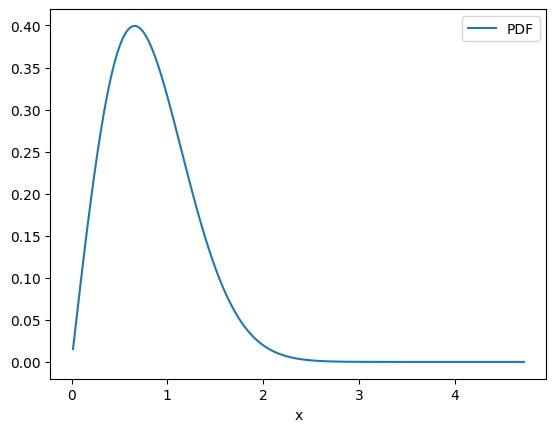

In [ ]:
import math

for i in range(len(sample_sizes)):
    statistic_tables[i]['PDF'] = ((-statistic_tables[i]['x']**2)/(2*summary_table['Wariant'][i]))
    statistic_tables[i]['PDF'] = statistic_tables[i]['PDF'].apply(lambda x: math.exp(x))
    statistic_tables[i]['PDF'] = statistic_tables[i]['PDF'] * statistic_tables[i]['x']
    statistic_tables[i][['x', 'PDF']].sort_values(by='x').plot('x', 'PDF')
    


In [ ]:
import math



print(math.exp(-5))

0.006737946999085467
